# Fire


✅ Fichier fusionné enregistré avec succès : /content/drive/MyDrive/data_set/fire/dzd_tun_fire.csv


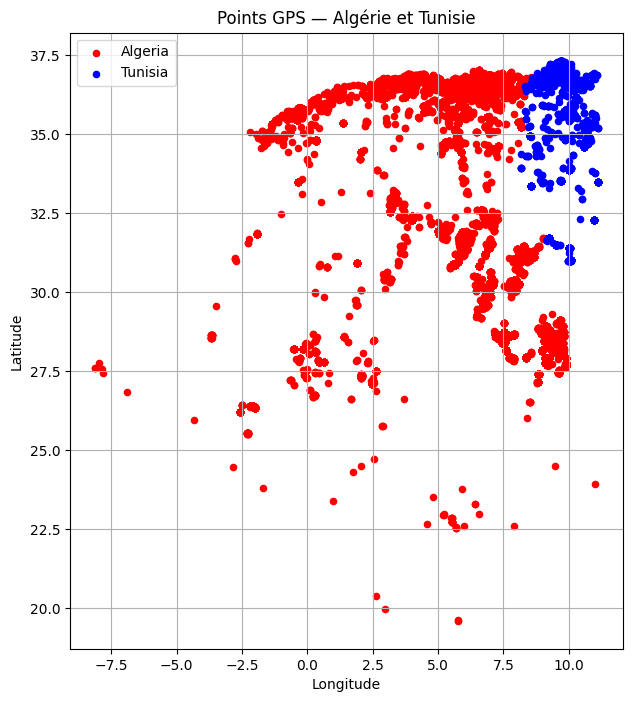

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# --- 1) Chemins vers tes fichiers CSV ---
csv_algerie = "/content/drive/MyDrive/data_set/fire/viirs-jpss1_2024_Algeria.csv"
csv_tunisie = "/content/drive/MyDrive/data_set/fire/viirs-jpss1_2024_Tunisia.csv"
csv_output  = "/content/drive/MyDrive/data_set/fire/dzd_tun_fire.csv"

# --- 2) Lire les fichiers CSV ---
df_algerie = pd.read_csv(csv_algerie)
df_tunisie = pd.read_csv(csv_tunisie)

# --- 3) Ajouter une colonne d’identification du pays ---
df_algerie["country"] = "Algeria"
df_tunisie["country"] = "Tunisia"

# --- 4) Fusionner les deux fichiers ---
df_merged = pd.concat([df_algerie, df_tunisie], ignore_index=True)

# --- 5) Sauvegarder le résultat en CSV ---
df_merged.to_csv(csv_output, index=False)

print(f"✅ Fichier fusionné enregistré avec succès : {csv_output}")

# --- 6) Visualiser les points sur une carte rapide ---
gdf = gpd.GeoDataFrame(
    df_merged,
    geometry=gpd.points_from_xy(df_merged['longitude'], df_merged['latitude']),
    crs="EPSG:4326"
)

fig, ax = plt.subplots(figsize=(10, 8))
gdf[gdf["country"] == "Algeria"].plot(ax=ax, color="red", markersize=20, label="Algeria")
gdf[gdf["country"] == "Tunisia"].plot(ax=ax, color="blue", markersize=20, label="Tunisia")

ax.set_title("Points GPS — Algérie et Tunisie")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
ax.grid(True)
plt.show()


# Land cover

In [ ]:
import geopandas as gpd
import pandas as pd

# Charger les shapefiles ===
algeria_path = "/content/drive/MyDrive/data_set/landcover/land_cover_dzd/dza_gc_adg.shp"
tunisia_path = "/content/drive/MyDrive/data_set/landcover/land_cover_tun/tun_gc_adg.shp"

algeria = gpd.read_file(algeria_path)
tunisia = gpd.read_file(tunisia_path)

# === 2️⃣ Afficher les colonnes (attributs) de chaque fichier ===
print("🗺️ Colonnes du fichier Algérie :")
print(algeria.columns.tolist())
print("\n🗺️ Colonnes du fichier Tunisie :")
print(tunisia.columns.tolist())


🗺️ Colonnes du fichier Algérie :
['ID', 'GRIDCODE', 'AREA', 'LCCCODE', 'geometry']

🗺️ Colonnes du fichier Tunisie :
['AREA_M2', 'ID', 'GRIDCODE', 'LCCCode', 'geometry']


In [ ]:

#  Renommer les colonnes du fichier Tunisie
tunisia = tunisia.rename(columns={
    "AREA_M2": "AREA",
    "LCCCode": "LCCCODE",
    "GRIDCODE": "GRIDCODE",
})

# Afficher pour vérifier après renommage
print("\n✅ Colonnes du fichier Tunisie après renommage :")
print(tunisia.columns.tolist())

output_path = "/content/drive/MyDrive/data_set/landcover/land_cover_tun/tun_gc_adg.shp"
tunisia.to_file(output_path)


✅ Colonnes du fichier Tunisie après renommage :
['AREA', 'ID', 'GRIDCODE', 'LCCCODE', 'geometry']


/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 145830260 of field AREA of feature 13 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 363231253 of field AREA of feature 236 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1814000760 of field AREA of feature 1074 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 263106940 of field AREA of feature 1249 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 205784210 of field AREA of f

📏 CRS Algeria: EPSG:4326
📏 CRS Tunisia: EPSG:4326
✅ Colonnes communes utilisées : ['ID', 'GRIDCODE', 'AREA', 'LCCCODE', 'geometry', 'source']


/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 459084147.94999999 of field AREA of feature 3 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 233338208.68000001 of field AREA of feature 117 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 182894330.02000001 of field AREA of feature 119 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 2128029422.05 of field AREA of feature 641 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1

✅ Fusion terminée ! Fichier enregistré : /content/drive/MyDrive/data_set/landcover/land_cover_dzd_tun/dzd_tun_landcover.shp
Nombre total de polygones : 438513


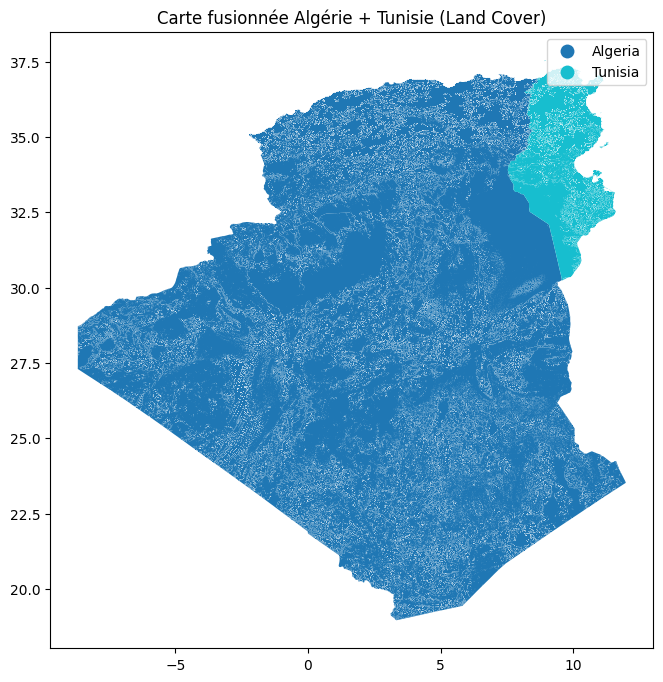

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os

algeria_path = "/content/drive/MyDrive/data_set/landcover/land_cover_dzd/dza_gc_adg.shp"
tunisia_path = "/content/drive/MyDrive/data_set/landcover/land_cover_tun/tun_gc_adg.shp"

algeria = gpd.read_file(algeria_path)
tunisia = gpd.read_file(tunisia_path)

algeria["source"] = "Algeria"
tunisia["source"] = "Tunisia"

print("📏 CRS Algeria:", algeria.crs)
print("📏 CRS Tunisia:", tunisia.crs)

if algeria.crs != tunisia.crs:
    print("⚙️ Harmonisation du CRS de la Tunisie vers celui de l’Algérie...")
    tunisia = tunisia.to_crs(algeria.crs)

common_cols = algeria.columns.intersection(tunisia.columns)
print(f"✅ Colonnes communes utilisées : {list(common_cols)}")

merged = gpd.GeoDataFrame(
    pd.concat([algeria[common_cols], tunisia[common_cols]], ignore_index=True),
    crs=algeria.crs
)

output_dir = "/content/drive/MyDrive/data_set/landcover/land_cover_dzd_tun"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "dzd_tun_landcover.shp")

merged.to_file(output_path)
print(f"✅ Fusion terminée ! Fichier enregistré : {output_path}")
print(f"Nombre total de polygones : {len(merged)}")

# === 7️⃣ (Optionnel) Visualisation rapide ===
merged.plot(column="source", legend=True, figsize=(10, 8))
plt.title("Carte fusionnée Algérie + Tunisie (Land Cover)")
plt.show()
